# Skewed Classes

In this exercise, we use digits data set of Scikit-learn. Run the code below read the description of the data set and show a sample. 



dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

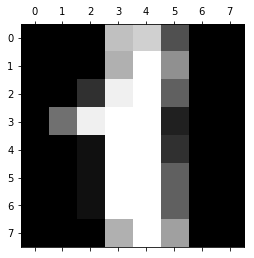

In [55]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


DigitsData=load_digits()
print(DigitsData.keys()) 
print(DigitsData.DESCR) #read description of the dataset

#plot one of the images in the data
plt.gray() 
plt.matshow(DigitsData.images[1]) 
plt.show() 

Our objective is to build classfiers that identify digit 9. For this purpose, do the following:

1) Define the target value to be equal to 1 only for digit 9

You can use: y= (DigitsData.target == 9)


- Find how many times y is equal to True and how many times it is equal to False

You can use: print(sum(y==True)); print(sum(y==False))


COMMENT: what do you observe? Is the dataset for this classification problem balanced or not?

In [56]:
# write your code here
y= (DigitsData.target == 9)
print(sum(y==True))
print(sum(y==False))

180
1617


The dataset consists of digits from 1-9, hence the ratio for any digit will approximately will 9:1, hence the dataset is not balanced

2) Find the accuracy of a dummy classifier that always selects the majority class. Use the DigitsData.data as features and y (defined above) as the response, then train_test_split to get training and test data.

You can use:

      X_train, X_test, Y_train, Y_test= train_test_split(DigitsData.data, y, random_state= 0)
      from sklearn.dummy import DummyClassifier
      dummy_majority=DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)

In [57]:
# write your code here
from sklearn.dummy import DummyClassifier
X_train, X_test, Y_train, Y_test= train_test_split(DigitsData.data, y, random_state= 0)
dummy_majority=DummyClassifier(strategy='most_frequent').fit(X_train, Y_train)

print("the accuracy of the dummy classifier is: ", dummy_majority.score(X_test, Y_test))

the accuracy of the dummy classifier is:  0.895555555556


3) Build QDA classifier. Find accuracy, confusion matrix, precision, and recall




C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.651111111111
Precision Score:  0.227722772277
Recall Score: 0.978723404255
[[247 156]
 [  1  46]]


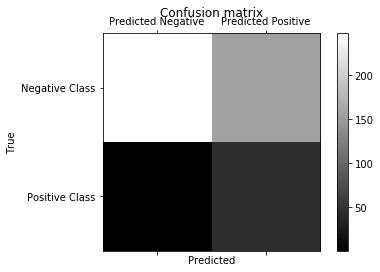

In [58]:
# write your code here
QDAmodelFitted = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)
QDAmodelFitted.score(X_test, Y_test)
print("Accuracy:", QDAmodelFitted.score(X_test, Y_test))
PredictedOutput=QDAmodelFitted.predict(X_test) # predicted output of classification
confusion=confusion_matrix(Y_test,PredictedOutput)
print("Precision Score: ", precision_score(Y_test,PredictedOutput))
print("Recall Score:", recall_score(Y_test,PredictedOutput))
print(confusion)
ylabels = ['Negative Class', 'Positive Class']
xlabels = ['Predicted Negative', 'Predicted Positive']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + xlabels)
ax.set_yticklabels([''] + ylabels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

4) Build LDA classifier. Find accuracy, confusion matrix, precision, and recall



C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy: 0.964444444444
Precision Score:  0.816326530612
Recall Score: 0.851063829787
[[394   9]
 [  7  40]]


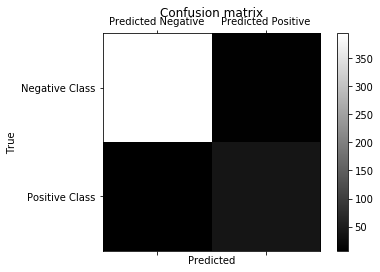

In [59]:
# write your code here
LDAmodelFitted = LinearDiscriminantAnalysis().fit(X_train, Y_train)
LDAmodelFitted.score(X_test, Y_test)
print("Accuracy:", LDAmodelFitted.score(X_test, Y_test))
PredictedOutput=LDAmodelFitted.predict(X_test) # predicted output of classification
confusion=confusion_matrix(Y_test,PredictedOutput)
print("Precision Score: ", precision_score(Y_test,PredictedOutput))
print("Recall Score:", recall_score(Y_test,PredictedOutput))
print(confusion)
ylabels = ['Negative Class', 'Positive Class']
xlabels = ['Predicted Negative', 'Predicted Positive']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + xlabels)
ax.set_yticklabels([''] + ylabels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Find the 5-fold cross validation scores for logistic regression (with default regularization, C=1) that classifies 
the ten classes of the digits data (used in the previous exercise). Comment on your result. What is the average accuracy of the 5 folds? 

In [60]:
from sklearn.linear_model import LogisticRegression
logRegModel=LogisticRegression(C=1)
scores = cross_val_score(logRegModel,DigitsData.data,DigitsData.target,cv=5)
print("5 fold cross validation scores are: ",scores)
print("Average of 5 fold cross validation scores is: ",np.mean(scores)) 

5 fold cross validation scores are:  [ 0.92307692  0.88121547  0.94986072  0.95798319  0.89295775]
Average of 5 fold cross validation scores is:  0.921018811336
